<a href="https://colab.research.google.com/github/rerere-bit/data-related-repos/blob/main/clustering_listing_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Listing 4-1 sampai 4-20

Muhammad Zarrar Al Faruq Hasmin Tamsah D121231110

In [1]:
#Listing 4-1 Importing Packages Required for This Chapter

%matplotlib inline

import operator
import itertools
import numpy as np
import pandas as pd
from plotnine import ggplot
import seaborn as sns
import matplotlib as mpl
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import euclidean_distances, silhouette_score

rcParams['figure.figsize'] = 15, 5

In [2]:
#Listing 4-2 Reading the Data in the Memory, and Subsetting Features

data_train = pd.read_csv('/content/[UCI] AAAI-14 Accepted Papers - Papers.csv')
data_train = data_train[['title', 'groups', 'keywords', 'topics']]

In [3]:
#Listing 4-3 Printing the Size of the Dataset and Printing the First Few Rows of the Dataset

print(len(data_train))
data_train.head()

398


,title,groups,keywords,topics
0,Kernelized Bayesian Transfer Learning,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...
1,"""Source Free"" Transfer Learning for Text Class...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...
2,A Generalization of Probabilistic Serial to Ra...,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting
3,Lifetime Lexical Variation in Social Media,NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...
4,Hybrid Singular Value Thresholding for Tensor ...,Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...


In [4]:
#Listing 4-4 Stretching the Data Frame Row-wise as a Function of Groups

s = data_train['groups'].str.split('\n').apply(pd.Series).stack()
s.index = s.index.droplevel(-1)
s.name = 'groups'
del data_train['groups']
data_train = data_train.join(s).reset_index()

In [5]:
#Listing 4-5 Adding New Variable for Group Membership

data_train['flags'] = pd.Series(np.ones(len(data_train)), index=data_train.index)
data_train.head()

,index,title,keywords,topics,groups,flags
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA),1.0
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW),1.0
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA),1.0
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP),1.0
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM),1.0


In [6]:
#Listing 4-6 Adding a Function for Matrix Creation

def matrix_from_df(data_train):

  matrix = data_train.pivot_table(index=['title'], columns=['groups'], values='flags')
  matrix = matrix.fillna(0).reset_index()
  x_cols = matrix.columns[1:]
  return matrix, x_cols

In [7]:
#Listing 4-7 Retrieve Matrix and x cols from the matric_from_dfMethod

matrix, x_cols = matrix_from_df(data_train)
matrix.head()

groups,title,AI and the Web (AIW),Applications (APP),Cognitive Modeling (CM),Cognitive Systems (CS),Computational Sustainability and AI (CSAI),Game Playing and Interactive Entertainment (GPIE),Game Theory and Economic Paradigms (GTEP),Heuristic Search and Optimization (HSO),Human-Computation and Crowd Sourcing (HCC),...,Multiagent Systems (MAS),NLP and Knowledge Representation (NLPKR),NLP and Machine Learning (NLPML),NLP and Text Mining (NLPTM),Novel Machine Learning Algorithms (NMLA),Planning and Scheduling (PS),Reasoning under Uncertainty (RU),Robotics (ROB),Search and Constraint Satisfaction (SCS),Vision (VIS)
0,"""Source Free"" Transfer Learning for Text Class...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A Characterization of the Single-Peaked Single...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"A Computational Method for (MSS,CoMSS) Partiti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,A Control Dichotomy for Pure Scoring Rules,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Convex Formulation for Semi-supervised Multi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Elbow for KMeans clustering')

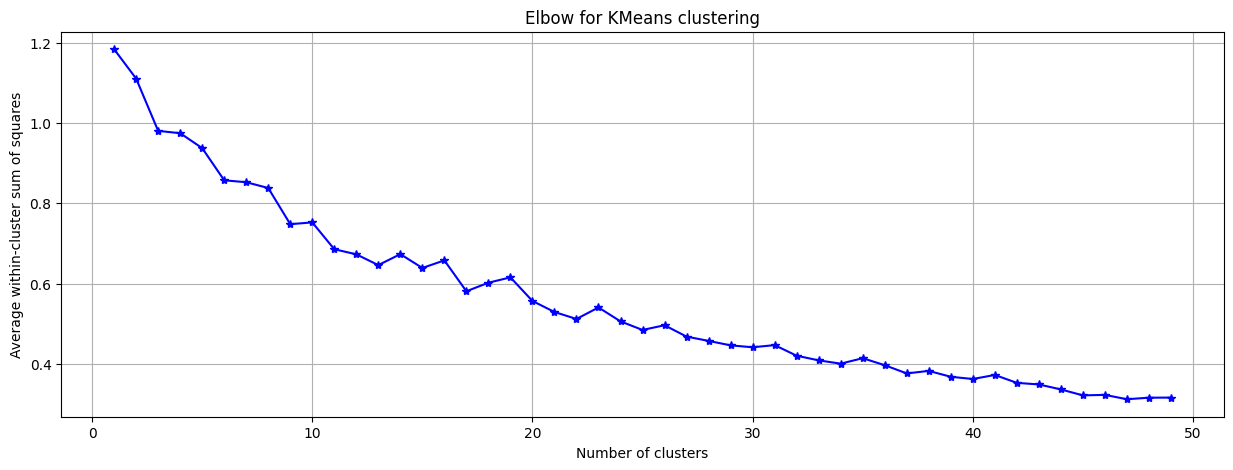

In [8]:
#Listing 4-8 Applying Elbow Method and Variance Explained on Data Matrix

matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]
K = range(1,50)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

Text(0.5, 1.0, 'Elbow for KMeans clustering')

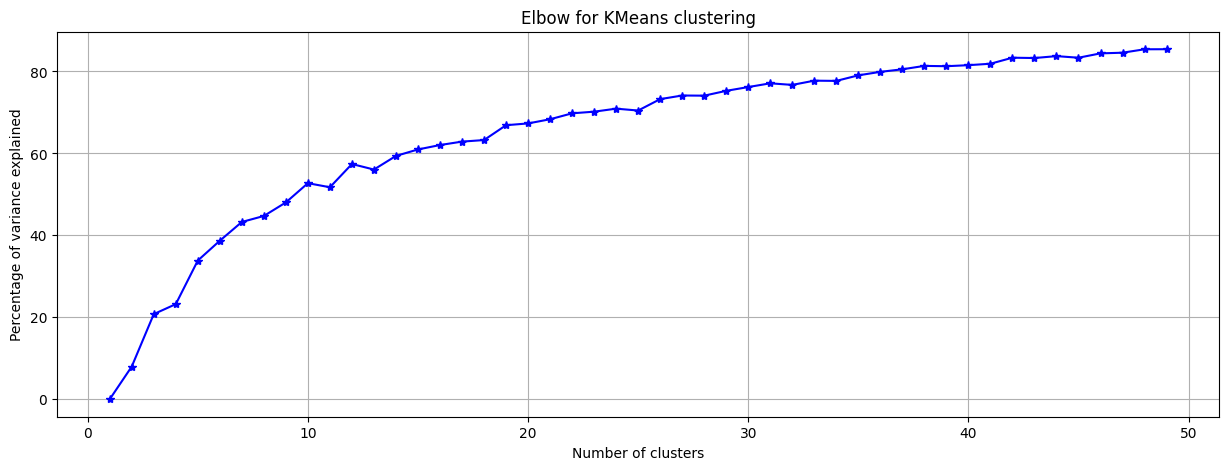

In [9]:
#Listing 4-9 Applying Elbow Method and Variance Explained to Data Matrix

matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]
K = range(1,50)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

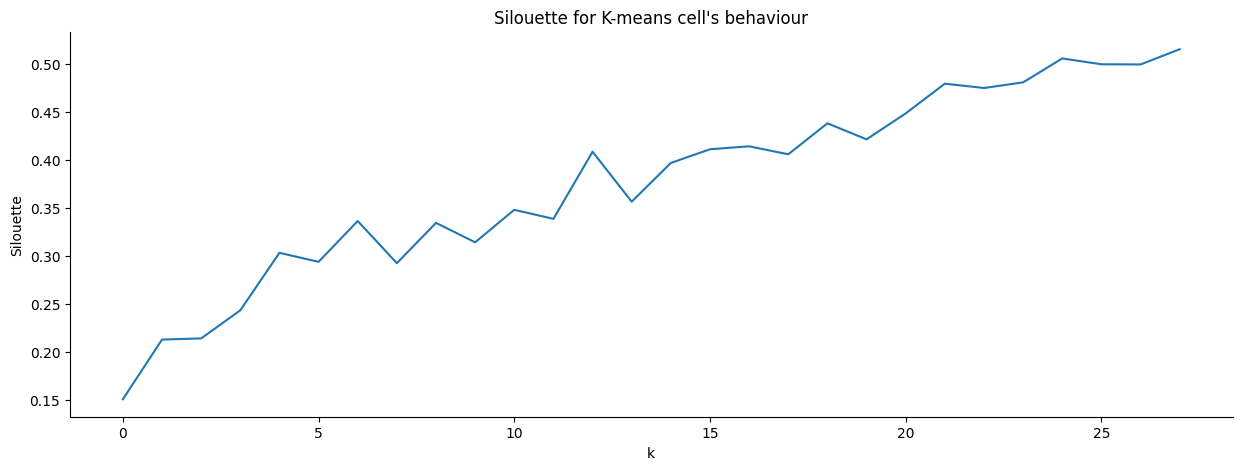

In [10]:
#Listing 4-10 Plotting Silhouette Score Plot from the Data Matrix

s = []
for n_clusters in range(2,30):
 kmeans = KMeans(n_clusters=n_clusters)
 kmeans.fit(X)
 labels = kmeans.labels_
 centroids = kmeans.cluster_centers_
 s.append(silhouette_score(X, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

In [11]:
#Listing 4-11 Training k-means Model for Cluster Size of 9

matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]
cluster = KMeans(n_clusters = 9, random_state = 2)
matrix['cluster'] = cluster.fit_predict(X)
matrix.cluster.value_counts()

,count
cluster,
3,128
7,45
0,42
5,41
2,32
6,32
4,32
8,30
1,14


In [12]:
#Listing 4-12 Using PCA to Transform Group-Related Features into Two Components

pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()
customer_clusters = matrix[['title', 'cluster', 'x', 'y']]
customer_clusters.head()

groups,title,cluster,x,y
0,"""Source Free"" Transfer Learning for Text Class...",0,0.615810,-0.060295
1,A Characterization of the Single-Peaked Single...,2,-0.756838,0.971322
2,"A Computational Method for (MSS,CoMSS) Partiti...",7,-0.287956,-0.216148
3,A Control Dichotomy for Pure Scoring Rules,6,-0.521295,0.570206
4,A Convex Formulation for Semi-supervised Multi...,5,0.198578,-0.129668


In [13]:
#Listing 4-16 Creating Function to Plot Wordcloud for Each Cluster

def plot_wordcloud(df, clusters, pivot):
 fig = plt.figure(figsize=(15,29.5))
 for cluster in range(clusters):

  List_ = []
  for x in df[df['cluster']==cluster][pivot]:
    try:
      List_.extend(x.split('\n'))
    except:
      pass

  if List_:
    ax = fig.add_subplot(5,2,cluster+1)
    wordcloud = wordcloud_object(List_)
    plt.title('Cluster: %d'%(cluster+1))
    ax.imshow(wordcloud)
    ax.axis('off')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names


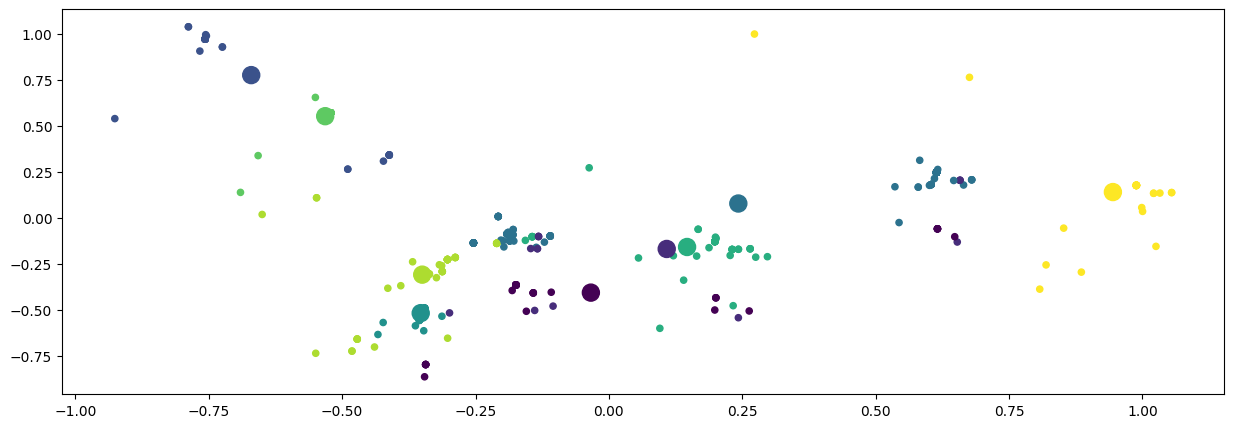

In [14]:
#Listing 4-13 Plotting Clusters in a Two-Dimensional Space

cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
plt.scatter(customer_clusters['x'], customer_clusters['y'], s = 20,
c=customer_clusters['cluster'])
plt.scatter(cluster_centers['x'], cluster_centers['y'], s = 150, c=cluster_centers['cluster'])

In [15]:
#Listing 4-14 Merging Matrix into the Original Data Frame

customer_clusters.columns.name = None
df = data_train.merge(customer_clusters, on='title')
df.head()

,index,title,keywords,topics,groups,flags,cluster,x,y
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA),1.0,3,0.613870,0.245408
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW),1.0,0,0.615810,-0.060295
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA),1.0,0,0.615810,-0.060295
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP),1.0,6,-0.521295,0.570206
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM),1.0,3,-0.183192,-0.090091


In [16]:
#Listing 4-15 Creating Function to Generate Wordcloud
!apt-get install -y fonts-dejavu

def wordcloud_object(word_string):
 wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',stopwords=STOPWORDS, background_color='black', width=1200, height=1000).generate(' '.join(word_string))
 return wordcloud

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


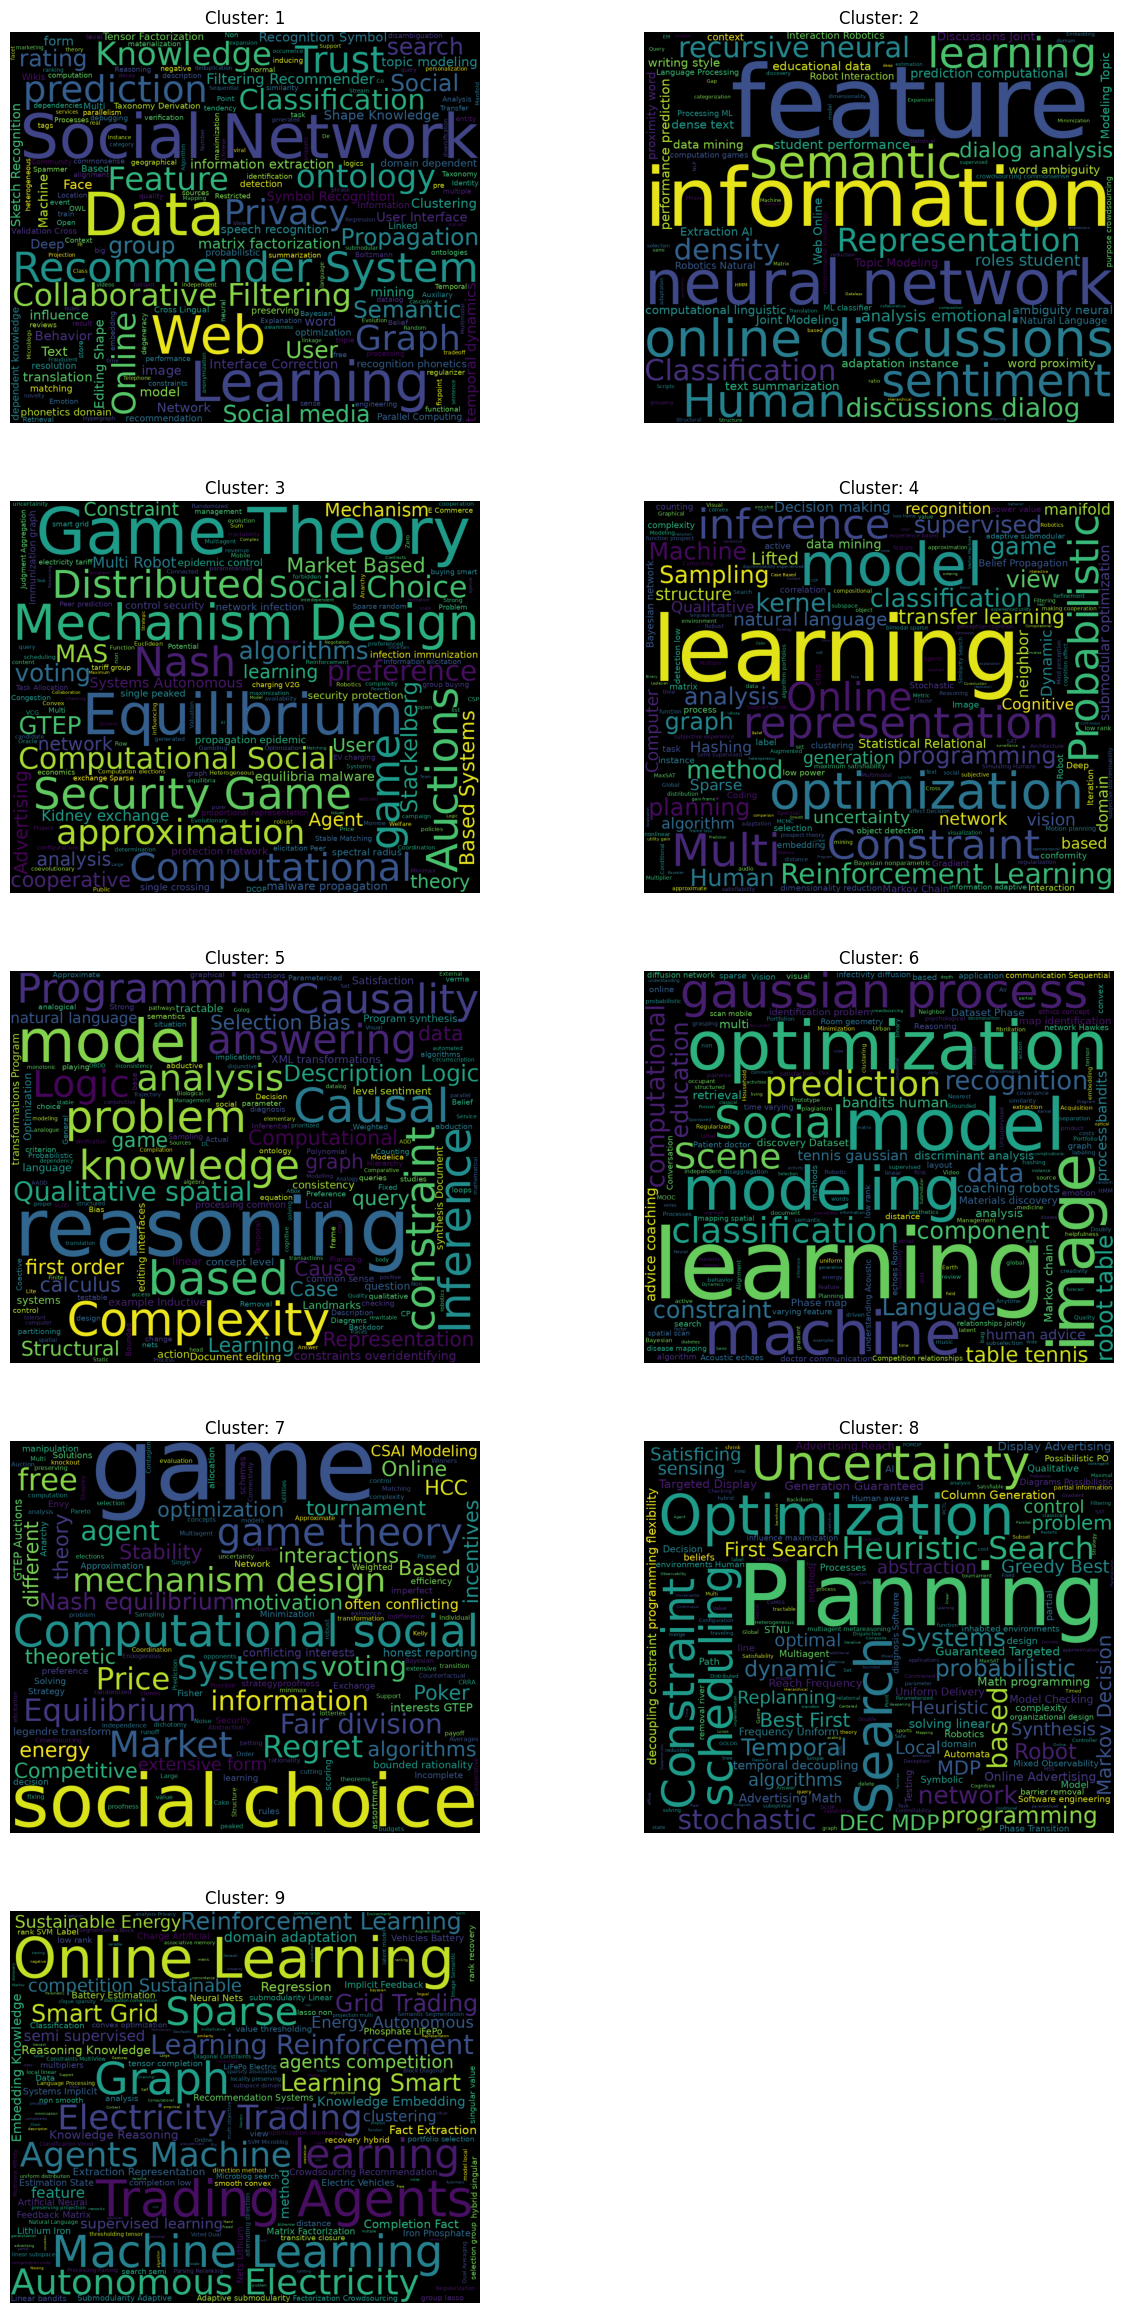

In [17]:
#Listing 4-17 Generating Wordclouds of Feature Named ‘Keywords’

plot_wordcloud(df, cluster.n_clusters, 'keywords')

In [18]:
#Listing 4-18 Define Method to Find Complete Keywords for Given Clusters and Unigram

def perform_cluster_group_audit(clusters, term):
 for cluster in clusters:

  df_cluster = df[df['cluster'] == cluster]
  print('Cluster number: %d'%(cluster + 1))
  keywords = list(df_cluster['keywords'])
  keywords = [keyword.split('\n') for keyword in keywords]
  keywords = [item for sublist in keywords for item in sublist]
  keywords = [keyword.lower() for keyword in keywords if term in
  keyword.lower()]
  keywords_freq = {x:keywords.count(x) for x in keywords}
  print(sorted(keywords_freq.items(), key=operator.itemgetter(1), reverse=True))
  print('\n')


In [19]:
#Listing 4-19 Using Function to Find Keywords for Search in clusters 0 and 4

perform_cluster_group_audit([0,4], 'search')

Cluster number: 1
[('web search personalization', 1), ('entity search', 1), ('real-time web search', 1), ('search snippets', 1), ('search result diversification', 1)]


Cluster number: 5
[]




In [20]:
#Listing 4-20 Using Function to Find Keywords for Social in Clusters 2, 3, and 6

perform_cluster_group_audit([2,3,6], 'social')

Cluster number: 3
[('computational social choice', 7), ('social welfare', 2), ('influencing social networks', 2)]


Cluster number: 4
[('social conformity', 2), ('social networks', 1)]


Cluster number: 7
[('computational social choice', 11), ('social choice theory', 2), ('social decision schemes', 2), ('randomized social choice', 1)]


